In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
map(pd.read_csv, ["Unemployment in India.csv","Unemployment_Rate_upto_11_2020.csv"])

In [4]:
df1 = pd.read_csv("Unemployment in India.csv")
df2 = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
df = pd.concat([df1, df2]).reset_index().drop('index', axis=1)
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Region.1,longitude,latitude
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,NaN,NaN,NaN
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,NaN,NaN,NaN
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,NaN,NaN,NaN
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,NaN,NaN,NaN
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1030,West Bengal,30-06-2020,M,7.29,30726310.0,40.39,NaN,East,22.9868,87.855
1031,West Bengal,31-07-2020,M,6.83,35372506.0,46.17,NaN,East,22.9868,87.855
1032,West Bengal,31-08-2020,M,14.87,33298644.0,47.48,NaN,East,22.9868,87.855
1033,West Bengal,30-09-2020,M,9.35,35707239.0,47.73,NaN,East,22.9868,87.855


In [5]:
df[' Frequency'] = 'M'
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())
df['longitude'] = df['longitude'].fillna(df['longitude'].mean())
df['Area'] = df['Area'].ffill()
df['Region.1'] = df['Region.1'].bfill()
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Region.1,longitude,latitude
0,Andhra Pradesh,31-05-2019,M,3.65,11999139.0,43.24,Rural,South,22.826048,80.532425
1,Andhra Pradesh,30-06-2019,M,3.05,11755881.0,42.05,Rural,South,22.826048,80.532425
2,Andhra Pradesh,31-07-2019,M,3.75,12086707.0,43.50,Rural,South,22.826048,80.532425
3,Andhra Pradesh,31-08-2019,M,3.32,12285693.0,43.97,Rural,South,22.826048,80.532425
4,Andhra Pradesh,30-09-2019,M,5.17,12256762.0,44.68,Rural,South,22.826048,80.532425
...,...,...,...,...,...,...,...,...,...,...
1030,West Bengal,30-06-2020,M,7.29,30726310.0,40.39,Urban,East,22.986800,87.855000
1031,West Bengal,31-07-2020,M,6.83,35372506.0,46.17,Urban,East,22.986800,87.855000
1032,West Bengal,31-08-2020,M,14.87,33298644.0,47.48,Urban,East,22.986800,87.855000
1033,West Bengal,30-09-2020,M,9.35,35707239.0,47.73,Urban,East,22.986800,87.855000


In [6]:
df = df.rename(columns={df.columns[0]:'State',df.columns[3]:'EUR',df.columns[4]:'EE', df.columns[5]:'ELPR', df.columns[7]:'Region'})
df.head()


,State,Date,Frequency,EUR,EE,ELPR,Area,Region,longitude,latitude
0,Andhra Pradesh,31-05-2019,M,3.65,11999139.0,43.24,Rural,South,22.826048,80.532425
1,Andhra Pradesh,30-06-2019,M,3.05,11755881.0,42.05,Rural,South,22.826048,80.532425
2,Andhra Pradesh,31-07-2019,M,3.75,12086707.0,43.50,Rural,South,22.826048,80.532425
3,Andhra Pradesh,31-08-2019,M,3.32,12285693.0,43.97,Rural,South,22.826048,80.532425
4,Andhra Pradesh,30-09-2019,M,5.17,12256762.0,44.68,Rural,South,22.826048,80.532425


In [7]:
region_stats = df.groupby(['Region'])[['EUR','EE','ELPR']].mean().reset_index()
region_stats = round(region_stats,2)
region_stats

,Region,EUR,EE,ELPR
0,East,13.92,19602366.90,40.11
1,North,15.89,13072487.92,38.70
2,Northeast,10.95,3617105.53,52.06
3,South,11.69,7717169.72,42.47
4,West,8.24,18623512.72,41.26


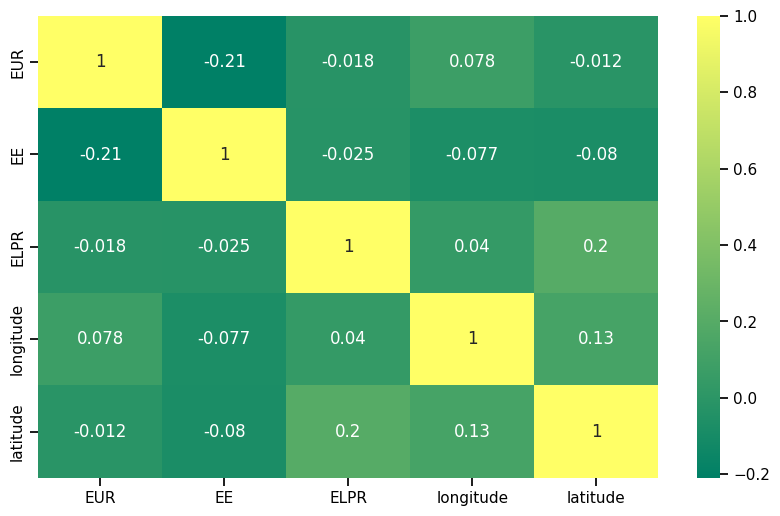

In [8]:
heat_maps = df[['EUR','EE', 'ELPR','longitude', 'latitude']]

heat_maps = heat_maps.corr()

plt.figure(figsize=(10,6))
sns.set_context('notebook',font_scale=1)
sns.heatmap(heat_maps, annot=True,cmap='summer');

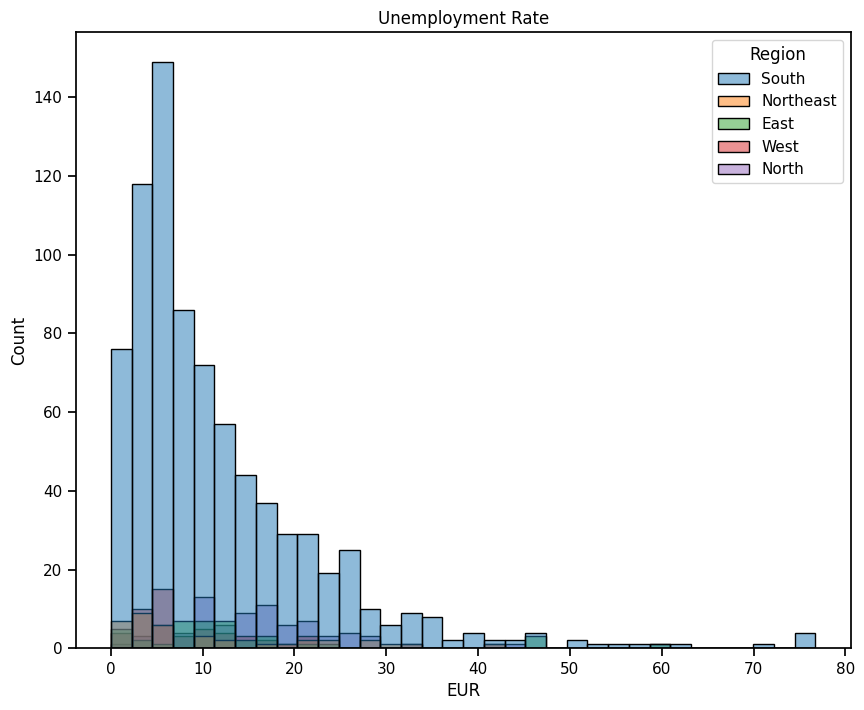

In [9]:
df.columns= ["State","Date","Frequency","EUR","EE","ELPR","Area","Region","longitude","latitude"]

plt.figure(figsize=(10, 8))
plt.title("Unemployment Rate")
sns.histplot(x="EUR", hue="Region", data=df)
plt.show()

In [10]:
import plotly.express as px


In [11]:
region = df.groupby(["Region"])[['EUR', "EE", "ELPR"]].mean()
region = pd.DataFrame(region).reset_index()

fig = px.bar(region, x="Region", y="EUR", color="Region", title="Average Unemployment Rate by Region")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [16]:
df.dropna(inplace=True)

In [17]:
unemployment = df[["State", "Region", "EUR"]]

fig = px.sunburst(unemployment, path=['Region','State'], values='EUR',
                  title= 'Unemployment rate in every State and Region', height=650)
fig.show()